In [1]:
! nvidia-smi

Thu Jun 18 03:32:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Python 基礎
- https://rate.bot.com.tw/xrt/quote/l6m/JPY

In [9]:
import pandas
dfs = pandas.read_html('https://rate.bot.com.tw/xrt/quote/l6m/JPY')

In [15]:
df = dfs[0].iloc[:,[0,3]]
df.columns = ['date', 'price']

In [16]:
df.head()

,date,price
0,2020/06/18,0.2806
1,2020/06/17,0.2798
2,2020/06/16,0.2797
3,2020/06/15,0.2799
4,2020/06/12,0.2803


In [17]:
df['date'] = pandas.to_datetime(df['date'], format = '%Y/%m/%d')
df.set_index('date', drop='date', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


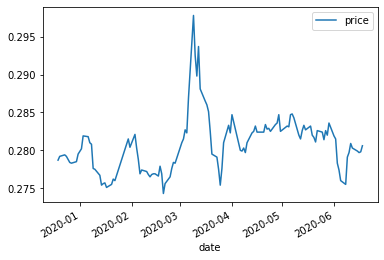

In [19]:
df.plot(kind = 'line')

In [22]:
df.sort_index(inplace=True)
df['ma30'] = df['price'].rolling(window = 30).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


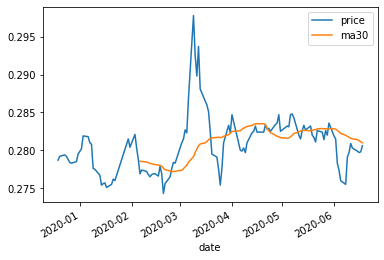

In [23]:
df.plot(kind = 'line')

## Python 網路爬蟲
- https://www.twse.com.tw/zh/page/trading/exchange/BFT41U.html

In [2]:
import requests
res = requests.get('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=20200617&type=MS&_=1592451186375')

In [4]:
jd = res.json()

In [8]:
import pandas
df = pandas.DataFrame(jd['data7'])
df.columns = jd['fields7']
df

,成交統計,成交金額(元),成交股數(股),成交筆數
0,1.一般股票,"164,333,551,338","3,157,885,314","1,363,454"
1,2.台灣存託憑證,"73,868,475","12,123,175","2,815"
2,3.受益憑證,0,0,0
3,4.ETF,"9,172,651,148","783,179,061","94,186"
4,5.受益證券,"5,055,810","443,000",52
5,6.變更交易股票,"14,108,876","2,913,030",808
6,7.認購(售)權證,"2,076,111,930","1,471,811,000","79,312"
7,8.轉換公司債,0,0,0
8,9.附認股權特別股,0,0,0
9,10.附認股權公司債,0,0,0


In [8]:
import pandas_datareader
pandas_datareader.get_data_yahoo('hp')

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-06-22,72.800003,71.290001,72.209999,72.570000,1149900.0,53.709812
2015-06-23,73.220001,72.279999,72.459999,72.940002,1074300.0,53.983654
2015-06-24,72.250000,70.379997,71.709999,70.949997,3544700.0,52.510818
2015-06-25,71.339996,70.570000,70.959999,70.800003,1776700.0,52.399811
2015-06-26,71.419998,70.180000,70.599998,70.949997,3095800.0,52.510818
...,...,...,...,...,...,...
2020-06-11,23.360001,20.650000,22.000000,20.820000,2541600.0,20.820000
2020-06-12,23.030001,21.360001,22.480000,22.459999,1910600.0,22.459999
2020-06-15,23.670000,20.650000,20.980000,23.100000,2433900.0,23.100000


## Python 資料清理
- https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/rent_591_sample.csv

## Python 機器學習

- https://github.com/ywchiu/tibamepy/blob/master/data/customer_churn.csv

In [5]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/tibamepy/master/data/customer_churn.csv', index_col = 0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 1 to 3333
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3333 non-null   object 
 1   account_length                 3333 non-null   int64  
 2   area_code                      3333 non-null   object 
 3   international_plan             3333 non-null   object 
 4   voice_mail_plan                3333 non-null   object 
 5   number_vmail_messages          3333 non-null   int64  
 6   total_day_minutes              3333 non-null   float64
 7   total_day_calls                3333 non-null   int64  
 8   total_day_charge               3333 non-null   float64
 9   total_eve_minutes              3333 non-null   float64
 10  total_eve_calls                3333 non-null   int64  
 11  total_eve_charge               3333 non-null   float64
 12  total_night_minutes            3333 non-null   f

In [8]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [9]:
df = df.iloc[:,3:]
df['international_plan'] = df['international_plan'].replace({'yes':1, 'no':0 })
df['voice_mail_plan'] = df['voice_mail_plan'].replace({'yes':1, 'no':0 })
df['churn'] = df['churn'].replace({'yes':1, 'no':0 })

In [10]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
2,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
3,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
4,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
5,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [11]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
predicted = clf.predict(X)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(Y, predicted)

0.9996999699969997

## Python 資料視覺化